In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import sys
%matplotlib inline

In [2]:
train_dir = glob.glob("train_sample_videos/*.mp4")
test_dir = glob.glob("test_videos/*.mp4")

In [3]:
df_train = pd.read_json("train_sample_videos/metadata.json").transpose()
df_train.head()

,label,original,split
aagfhgtpmv.mp4,FAKE,vudstovrck.mp4,train
aapnvogymq.mp4,FAKE,jdubbvfswz.mp4,train
abarnvbtwb.mp4,REAL,None,train
abofeumbvv.mp4,FAKE,atvmxvwyns.mp4,train
abqwwspghj.mp4,FAKE,qzimuostzz.mp4,train


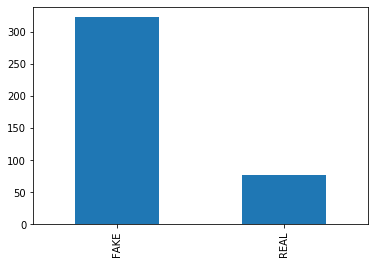

In [4]:
df_train.label.value_counts().plot.bar()

In [5]:
def read_img(img):
    image = cv2.imread(img,cv2.IMREAD_COLOR)
    image = cv2.resize(image, (229,229))
    return image

In [6]:
def display_img(video):
    cap = cv2.VideoCapture(video) # taking one picture
    ret, frame = cap.read()
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)
def display(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

In [7]:
face_cascade = cv2.CascadeClassifier('default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 10) 
        
    return face_img

In [9]:
def ROI(img):    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        roi = face_img[y:y+h,x:x+w] 
        
        
    return roi

In [10]:
def ROI_Expand(img):
    
    offset = 50  # play around this value
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        roi = face_img[y-offset:y+h+offset,x-offset:x+w+offset] 
        
        
    return roi

In [21]:
v1

'train_sample_videos/benmsfzfaz.mp4'

In [22]:
v1_name = v1.split("/")[-1]
v1_name

'benmsfzfaz.mp4'

In [23]:
df_train[df_train.index == v1_name]

,label,original,split
benmsfzfaz.mp4,FAKE,kysxawkest.mp4,train


In [25]:
for v1 in train_dir:
    count = 0
    v1_name = v1.split("/")[-1]
    cap = cv2.VideoCapture(v1)
    #cap.set(cv2.CAP_PROP_POS_AVI_RATIO,1)
    length = cap.get(cv2.CAP_PROP_POS_MSEC)//1000
    cap = cv2.VideoCapture(v1)
    if not os.path.exists("train_frames/" + v1_name.split(".")[0]):
        os.mkdir("train_frames/" + v1_name.split(".")[0])
    count = 0
    cap = cv2.VideoCapture(v1)
    ret,frame = cap.read()
    #print(length)
    while count < 10:
        cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
        ret,frame = cap.read()
        image = frame
        try:
            r = ROI(image)
            r = ROI_Expand(image)
            cv2.imwrite("train_frames/" + v1_name.split(".")[0] + "/frame" + str(count) + ".jpg",r)     # Next I will save frame as JPEG
            count = count + 1
        except:
            print(v1_name,count,"failed")
            count = count + 1

aapnvogymq.mp4 0 failed
aapnvogymq.mp4 1 failed
aapnvogymq.mp4 3 failed
abarnvbtwb.mp4 0 failed
abarnvbtwb.mp4 1 failed
abofeumbvv.mp4 0 failed
abofeumbvv.mp4 1 failed
abofeumbvv.mp4 2 failed
abofeumbvv.mp4 3 failed
abofeumbvv.mp4 4 failed
abofeumbvv.mp4 5 failed
abofeumbvv.mp4 6 failed
abofeumbvv.mp4 8 failed
abofeumbvv.mp4 9 failed
acxnxvbsxk.mp4 9 failed
adhsbajydo.mp4 0 failed
adhsbajydo.mp4 1 failed
adhsbajydo.mp4 2 failed
adhsbajydo.mp4 3 failed
adhsbajydo.mp4 5 failed
adhsbajydo.mp4 6 failed
adhsbajydo.mp4 7 failed
adhsbajydo.mp4 8 failed
adhsbajydo.mp4 9 failed
aelzhcnwgf.mp4 7 failed
aevrfsexku.mp4 1 failed
aevrfsexku.mp4 2 failed
afoovlsmtx.mp4 0 failed
afoovlsmtx.mp4 9 failed
agdkmztvby.mp4 0 failed
agdkmztvby.mp4 1 failed
agdkmztvby.mp4 7 failed
agqphdxmwt.mp4 4 failed
agqphdxmwt.mp4 5 failed
agrmhtjdlk.mp4 0 failed
agrmhtjdlk.mp4 2 failed
agrmhtjdlk.mp4 3 failed
agrmhtjdlk.mp4 4 failed
aipfdnwpoo.mp4 0 failed
aipfdnwpoo.mp4 2 failed
aipfdnwpoo.mp4 3 failed
aipfdnwpoo.mp4 7

blpchvmhxx.mp4 6 failed
blpchvmhxx.mp4 7 failed
blpchvmhxx.mp4 8 failed
blpchvmhxx.mp4 9 failed
bmehkyanbj.mp4 0 failed
bmehkyanbj.mp4 1 failed
bmehkyanbj.mp4 2 failed
bmehkyanbj.mp4 3 failed
bmehkyanbj.mp4 4 failed
bmehkyanbj.mp4 5 failed
bmehkyanbj.mp4 6 failed
bmehkyanbj.mp4 7 failed
bmehkyanbj.mp4 8 failed
bmehkyanbj.mp4 9 failed
bmhvktyiwp.mp4 6 failed
bmioepcpsx.mp4 8 failed
bnjcdrfuov.mp4 5 failed
bnjcdrfuov.mp4 9 failed
boovltmuwi.mp4 3 failed
boovltmuwi.mp4 4 failed
boovltmuwi.mp4 5 failed
boovltmuwi.mp4 6 failed
boovltmuwi.mp4 7 failed
boovltmuwi.mp4 8 failed
bopqhhalml.mp4 0 failed
bopqhhalml.mp4 1 failed
bopqhhalml.mp4 2 failed
bopqhhalml.mp4 3 failed
bopqhhalml.mp4 4 failed
bopqhhalml.mp4 5 failed
bopqhhalml.mp4 7 failed
bopqhhalml.mp4 8 failed
bopqhhalml.mp4 9 failed
bpwzipqtxf.mp4 0 failed
bqhtpqmmqp.mp4 1 failed
bqhtpqmmqp.mp4 3 failed
bqhtpqmmqp.mp4 4 failed
bqhtpqmmqp.mp4 7 failed
bqhtpqmmqp.mp4 8 failed
bqkdbcqjvb.mp4 0 failed
bqkdbcqjvb.mp4 1 failed
bqkdbcqjvb.mp4 2

dhcndnuwta.mp4 2 failed
dhcndnuwta.mp4 4 failed
dhcndnuwta.mp4 6 failed
dhcndnuwta.mp4 7 failed
dhcndnuwta.mp4 8 failed
dhcndnuwta.mp4 9 failed
dhcselezer.mp4 0 failed
dhcselezer.mp4 1 failed
dhcselezer.mp4 2 failed
dhcselezer.mp4 3 failed
dhcselezer.mp4 4 failed
dhcselezer.mp4 5 failed
dhcselezer.mp4 7 failed
dhcselezer.mp4 8 failed
dhcselezer.mp4 9 failed
dhevettufk.mp4 1 failed
dhevettufk.mp4 2 failed
dhevettufk.mp4 3 failed
dhevettufk.mp4 5 failed
dhkwmjxwrn.mp4 2 failed
dhkwmjxwrn.mp4 7 failed
dhkwmjxwrn.mp4 9 failed
dhoqofwoxa.mp4 0 failed
dhoqofwoxa.mp4 1 failed
dhoqofwoxa.mp4 2 failed
dhoqofwoxa.mp4 3 failed
dhoqofwoxa.mp4 4 failed
dhoqofwoxa.mp4 5 failed
dhoqofwoxa.mp4 6 failed
dhoqofwoxa.mp4 7 failed
dhoqofwoxa.mp4 8 failed
dhoqofwoxa.mp4 9 failed
dhxctgyoqj.mp4 4 failed
dhxctgyoqj.mp4 9 failed
diopzaywor.mp4 2 failed
diopzaywor.mp4 3 failed
diopzaywor.mp4 4 failed
diopzaywor.mp4 5 failed
diopzaywor.mp4 7 failed
diqraixiov.mp4 0 failed
diqraixiov.mp4 1 failed
diqraixiov.mp4 2

eiwopxzjfn.mp4 5 failed
eiwopxzjfn.mp4 6 failed
eiwopxzjfn.mp4 7 failed
eiwopxzjfn.mp4 8 failed
eiwopxzjfn.mp4 9 failed
ekcrtigpab.mp4 0 failed
ekcrtigpab.mp4 2 failed
ekcrtigpab.mp4 3 failed
ekcrtigpab.mp4 4 failed
ekcrtigpab.mp4 5 failed
ekcrtigpab.mp4 7 failed
ekcrtigpab.mp4 9 failed
ekhacizpah.mp4 2 failed
ekkdjkirzq.mp4 0 failed
ekkdjkirzq.mp4 1 failed
ekkdjkirzq.mp4 3 failed
ekkdjkirzq.mp4 4 failed
elginszwtk.mp4 0 failed
elginszwtk.mp4 1 failed
elginszwtk.mp4 2 failed
elginszwtk.mp4 3 failed
elginszwtk.mp4 4 failed
elginszwtk.mp4 5 failed
elginszwtk.mp4 6 failed
elginszwtk.mp4 7 failed
elginszwtk.mp4 8 failed
elginszwtk.mp4 9 failed
ellavthztb.mp4 9 failed
emaalmsonj.mp4 0 failed
emaalmsonj.mp4 1 failed
emaalmsonj.mp4 2 failed
emaalmsonj.mp4 3 failed
emaalmsonj.mp4 4 failed
emaalmsonj.mp4 5 failed
emaalmsonj.mp4 6 failed
emaalmsonj.mp4 7 failed
emaalmsonj.mp4 8 failed
emaalmsonj.mp4 9 failed
emfbhytfhc.mp4 0 failed
ensyyivobf.mp4 0 failed
ensyyivobf.mp4 2 failed
ensyyivobf.mp4 3

In [26]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input,decode_predictions

In [27]:
#img_shape = (299,299,3)
base_model = InceptionV3(weights='imagenet',include_top=False,pooling='max')

In [28]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [34]:
frame_files = glob.glob("train_frames/*/*.jpg")

In [41]:
cnn_output = {}

In [191]:
cnn_model = Model(inputs=base_model.input, outputs=base_model.get_layer("global_max_pooling2d_2").output)
cnn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [42]:
for name in frame_files:
    try:
        img = image.load_img(name,target_size=(229,229,3))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        folder_name = name.split("/")[1] + ".mp4"
        if folder_name not in cnn_output.keys():
            cnn_output[folder_name] = []
        result = cnn_model.predict(x)
        cnn_output[folder_name].append(result)
    except:
        print(name,"failed")

train_frames/aelfnikyqj/frame1.jpg failed
train_frames/ajwpjhrbcv/frame0.jpg failed
train_frames/ajwpjhrbcv/frame1.jpg failed
train_frames/ajwpjhrbcv/frame2.jpg failed
train_frames/ajwpjhrbcv/frame3.jpg failed
train_frames/ajwpjhrbcv/frame4.jpg failed
train_frames/ajwpjhrbcv/frame5.jpg failed
train_frames/ajwpjhrbcv/frame6.jpg failed
train_frames/ajwpjhrbcv/frame7.jpg failed
train_frames/ajwpjhrbcv/frame8.jpg failed
train_frames/ajwpjhrbcv/frame9.jpg failed
train_frames/augtsuxpzc/frame2.jpg failed
train_frames/avmjormvsx/frame7.jpg failed
train_frames/aybgughjxh/frame8.jpg failed
train_frames/bguwlyazau/frame0.jpg failed
train_frames/bguwlyazau/frame5.jpg failed
train_frames/bguwlyazau/frame6.jpg failed
train_frames/bguwlyazau/frame7.jpg failed
train_frames/bguwlyazau/frame8.jpg failed
train_frames/bzythlfnhq/frame0.jpg failed
train_frames/bzythlfnhq/frame1.jpg failed
train_frames/bzythlfnhq/frame2.jpg failed
train_frames/bzythlfnhq/frame3.jpg failed
train_frames/bzythlfnhq/frame4.jpg

In [46]:
# display(x[0])

# model = Model(inputs=base_model.input, outputs=base_model.get_layer("global_max_pooling2d_2").output)
# model.summary()

# z = model.predict(x)

# z.shape

# roi = ROI(frame)
# # roi_expand = ROI_expand(roi)
# display(roi)

# display(frame)

# df = detect_face(frame)

# r = ROI(frame)

# display(df)

# display(r)

# x = glob.glob("train_frames/*/*.jpg")

# for i in range()
# x[0].split('/')[1]



In [48]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

In [162]:
model = Sequential()

# LSTM layer
model.add(LSTM(2048, return_sequences = False, dropout = 0.5, recurrent_dropout = 0.5, input_shape=(1,2048)))

# Fully Connected Layer
model.add(Dense(512, activation = 'relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [163]:
for (x,y) in cnn_output.items():
    label = df_train[df_train.index == x]['label'].values
    if label == "REAL":
        label = [0,1]
    else:
        label = [1,0]
    for frame in y:
        model.fit(np.array([frame]),np.array([label]))
    model.reset_states()

Epoch 1/1
1/1 [==============================] - 10s 10s/step - loss: 0.7172 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 9.0306e-04 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 4.7684e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 411ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 382ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 388ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 366ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 381ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 389ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==========================

Epoch 1/1
1/1 [==============================] - 0s 425ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 421ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 441ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 460ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 426ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 437ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

1/1 [==============================] - 0s 429ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 457ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 432ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 433ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 425ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 437ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0

Epoch 1/1
1/1 [==============================] - 0s 457ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 428ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 406ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 431ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 380ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 406ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 386ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 390ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 397ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 391ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 434ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 388ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 383ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 460ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 427ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 424ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 416ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 403ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 406ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 428ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 384ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 400ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 434ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 403ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 413ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 423ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 387ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 416ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [================

Epoch 1/1
1/1 [==============================] - 0s 405ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 426ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 390ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 421ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 424ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 411ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 390ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 385ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 397ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 421ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 442ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 447ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 420ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 421ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 459ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 443ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 425ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 429ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 411ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 433ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 389ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 400ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 422ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 437ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 441ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 429ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 427ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 444ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 422ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 371ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 406ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 428ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 429ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 423ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 423ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 438ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 439ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 400ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 397ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 388ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=====================

Epoch 1/1
1/1 [==============================] - 0s 419ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 442ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 451ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 458ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 432ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 441ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 430ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 432ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 438ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [===============

Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 440ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 443ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 408ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 433ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 387ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

1/1 [==============================] - 0s 420ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 428ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 420ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 448ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 481ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0

1/1 [==============================] - 0s 419ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 424ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 413ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 405ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 405ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 417ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 435ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 465ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 427ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 411ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 381ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 431ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 387ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 400ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 426ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 428ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 415ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 439ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

1/1 [==============================] - 0s 366ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 413ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 425ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 427ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 383ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 387ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 368ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0

Epoch 1/1
1/1 [==============================] - 0s 375ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 390ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 397ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 371ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 364ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 363ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 380ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 388ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

1/1 [==============================] - 0s 409ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 419ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 390ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 424ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] 

Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 405ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 432ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 408ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 406ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 457ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 437ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 430ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 396ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 441ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 419ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 382ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 398ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 403ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 475ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 430ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 418ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 395ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 409ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 401ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 402ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 433ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 393ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 413ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 403ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 421ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 399ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 397ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 388ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [===============

Epoch 1/1
1/1 [==============================] - 0s 444ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 423ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 424ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 460ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 1s 515ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 464ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 463ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 432ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 408ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 394ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [======================

Epoch 1/1
1/1 [==============================] - 0s 386ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 392ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 405ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 425ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 449ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 412ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 441ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 414ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [==============================] - 0s 408ms/step - loss: 16.1181 - acc: 0.0000e+00
Epoch 1/1
1/1 [=======================

Epoch 1/1
1/1 [==============================] - 0s 447ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 426ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 423ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 407ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 438ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 411ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 404ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 453ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 403ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/1
1/1 [=========================

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 2048)              16793600  
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 17,843,714
Trainable params: 17,843,714
Non-trainable params: 0
_________________________________________________________________


In [98]:
from sklearn import preprocessing

In [103]:
le = preprocessing.LabelEncoder()

In [104]:
le.fit(labels)

/home/garimell/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [106]:
y = le.transform(labels)

In [107]:
y.shape

(2765,)

In [132]:
x_train.values

array([[array([[[1.5660974, 1.4991686, 1.1490546, ..., 2.0232906, 0.5351174,
         1.2780346]]], dtype=float32)],
       [array([[[0.8617066, 2.7341347, 1.7801753, ..., 1.9531311, 0.       ,
         1.664746 ]]], dtype=float32)],
       [array([[[1.1231928, 1.841948 , 1.6100525, ..., 2.9122477, 0.6869506,
         1.6274315]]], dtype=float32)],
       [array([[[1.8656777 , 1.619017  , 1.2788737 , ..., 2.8607411 ,
         0.01013761, 0.70463264]]], dtype=float32)],
       [array([[[0.99560297, 1.4990412 , 2.279643  , ..., 2.7679365 ,
         1.1111162 , 1.0155928 ]]], dtype=float32)],
       [array([[[2.8081067, 1.348397 , 1.6604345, ..., 3.1807156, 0.6559149,
         1.0495497]]], dtype=float32)],
       [array([[[0.7982253, 1.6509689, 2.1981037, ..., 3.7004254, 1.9763998,
         0.6845903]]], dtype=float32)],
       [array([[[2.7554197, 2.232242 , 5.1727934, ..., 4.012055 , 0.5547009,
         1.0312084]]], dtype=float32)],
       [array([[[4.546894 , 1.3657396, 4.6370087, ..

In [145]:
from keras.utils import to_categorical

In [164]:
x=to_categorical(1)
x.shape

(2,)

In [160]:
x

array([0., 1.], dtype=float32)

In [165]:
model.evaluate()

ValueError: If evaluating from data tensors, you should specify the `steps` argument.

In [173]:
v1 = "test_videos/ahjnxtiamx.mp4"
count = 0
v1_name = v1.split("/")[-1]
cap = cv2.VideoCapture(v1)
 #cap.set(cv2.CAP_PROP_POS_AVI_RATIO,1)
length = cap.get(cv2.CAP_PROP_POS_MSEC)//1000
cap = cv2.VideoCapture(v1)
if not os.path.exists("test_frames/" + v1_name.split(".")[0]):
    os.mkdir("test_frames/" + v1_name.split(".")[0])
count = 0
cap = cv2.VideoCapture(v1)
ret,frame = cap.read()
#print(length)
while count < 10:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
    ret,frame = cap.read()
    image = frame
    try:
        r = ROI(image)
        r = ROI_Expand(image)
        cv2.imwrite("test_frames/" + v1_name.split(".")[0] + "/frame" + str(count) + ".jpg",r)     # Next I will save frame as JPEG
        count = count + 1
    except:
        print(v1_name,count,"failed")
        count = count + 1

ahjnxtiamx.mp4 1 failed


In [172]:
!mkdir test_frames

In [225]:
test_frames = glob.glob("test_frames/*/*.jpg")

In [226]:
test_frames

['test_frames/abarnvbtwb/frame2.jpg',
 'test_frames/abarnvbtwb/frame3.jpg',
 'test_frames/abarnvbtwb/frame4.jpg',
 'test_frames/abarnvbtwb/frame5.jpg',
 'test_frames/abarnvbtwb/frame6.jpg',
 'test_frames/abarnvbtwb/frame7.jpg',
 'test_frames/abarnvbtwb/frame8.jpg',
 'test_frames/abarnvbtwb/frame9.jpg',
 'test_frames/adohdulfwb/frame0.jpg',
 'test_frames/adohdulfwb/frame1.jpg',
 'test_frames/adohdulfwb/frame2.jpg',
 'test_frames/adohdulfwb/frame3.jpg',
 'test_frames/adohdulfwb/frame4.jpg',
 'test_frames/adohdulfwb/frame5.jpg',
 'test_frames/adohdulfwb/frame6.jpg',
 'test_frames/adohdulfwb/frame7.jpg',
 'test_frames/adohdulfwb/frame8.jpg',
 'test_frames/adohdulfwb/frame9.jpg',
 'test_frames/ahjnxtiamx/frame0.jpg',
 'test_frames/ahjnxtiamx/frame2.jpg',
 'test_frames/ahjnxtiamx/frame3.jpg',
 'test_frames/ahjnxtiamx/frame4.jpg',
 'test_frames/ahjnxtiamx/frame5.jpg',
 'test_frames/ahjnxtiamx/frame6.jpg',
 'test_frames/ahjnxtiamx/frame7.jpg',
 'test_frames/ahjnxtiamx/frame8.jpg',
 'test_frame

In [187]:
img = image.load_img('test_frames/ahjnxtiamx/frame0.jpg',target_size=(229,229))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [223]:
from keras.preprocessing import image

In [189]:
x.shape

(1, 229, 229, 3)

In [192]:
result = cnn_model.predict(x)

In [194]:
result.shape

(1, 2048)

In [210]:
print_out(x)

Fake


In [228]:
def print_out(x):
    result = cnn_model.predict(x)
    res = model.predict(np.array([result]))
    print(res)
    if res[0][0] > res[0][1]:
        print('Fake')
    else:
        print('Real')   

In [229]:
res

array([[1.000000e+00, 4.592891e-22]], dtype=float32)

In [230]:
for f in test_frames:
    print(f)
    img = image.load_img(f,target_size=(229,229))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(f)
    print_out(x)

test_frames/abarnvbtwb/frame2.jpg
test_frames/abarnvbtwb/frame2.jpg
[[1.0000000e+00 5.8715293e-22]]
Fake
test_frames/abarnvbtwb/frame3.jpg
test_frames/abarnvbtwb/frame3.jpg
[[1.0000000e+00 5.3763564e-22]]
Fake
test_frames/abarnvbtwb/frame4.jpg
test_frames/abarnvbtwb/frame4.jpg
[[1.000000e+00 4.813327e-22]]
Fake
test_frames/abarnvbtwb/frame5.jpg
test_frames/abarnvbtwb/frame5.jpg
[[1.0000000e+00 5.0573284e-22]]
Fake
test_frames/abarnvbtwb/frame6.jpg
test_frames/abarnvbtwb/frame6.jpg
[[1.000000e+00 4.998085e-22]]
Fake
test_frames/abarnvbtwb/frame7.jpg
test_frames/abarnvbtwb/frame7.jpg
[[1.000000e+00 5.397399e-22]]
Fake
test_frames/abarnvbtwb/frame8.jpg
test_frames/abarnvbtwb/frame8.jpg
[[1.0000000e+00 5.4041566e-22]]
Fake
test_frames/abarnvbtwb/frame9.jpg
test_frames/abarnvbtwb/frame9.jpg
[[1.000000e+00 5.210128e-22]]
Fake
test_frames/adohdulfwb/frame0.jpg
test_frames/adohdulfwb/frame0.jpg
[[1.000000e+00 5.071161e-22]]
Fake
test_frames/adohdulfwb/frame1.jpg
test_frames/adohdulfwb/frame1.j

In [221]:
v1 = "train_sample_videos/abarnvbtwb.mp4"
count = 0
v1_name = v1.split("/")[-1]
cap = cv2.VideoCapture(v1)
 #cap.set(cv2.CAP_PROP_POS_AVI_RATIO,1)
length = cap.get(cv2.CAP_PROP_POS_MSEC)//1000
cap = cv2.VideoCapture(v1)
if not os.path.exists("test_frames/" + v1_name.split(".")[0]):
    os.mkdir("test_frames/" + v1_name.split(".")[0])
count = 0
cap = cv2.VideoCapture(v1)
ret,frame = cap.read()
#print(length)
while count < 10:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
    ret,frame = cap.read()
    image = frame
    try:
        r = ROI(image)
        r = ROI_Expand(image)
        cv2.imwrite("test_frames/" + v1_name.split(".")[0] + "/frame" + str(count) + ".jpg",r)     # Next I will save frame as JPEG
        count = count + 1
    except:
        print(v1_name,count,"failed")
        count = count + 1

abarnvbtwb.mp4 0 failed
abarnvbtwb.mp4 1 failed
